### Q1

In [63]:
import numpy as np
from skimage import io
from skimage import color
from skimage import util
import matplotlib.pyplot as plt
from scipy import ndimage

%matplotlib inline

B = io.imread("images/fond.jpg")
I = io.imread("images/bb1.jpg")
B = util.img_as_ubyte(color.rgb2gray(B)).astype('int')
I = util.img_as_ubyte(color.rgb2gray(I)).astype('int')

### Q2

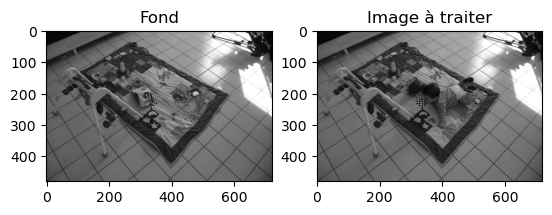

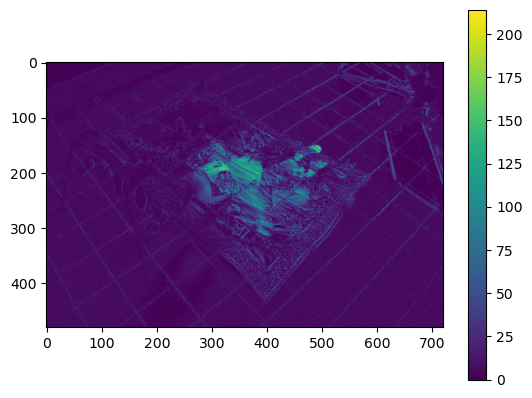

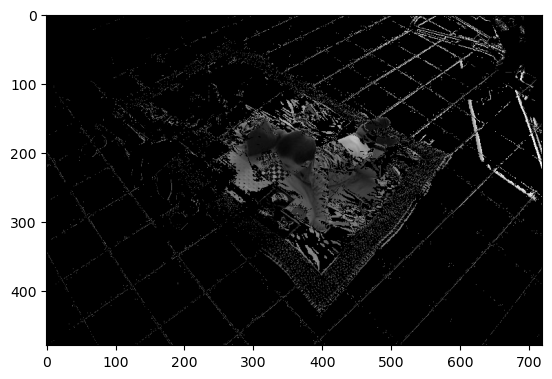

In [64]:
# Affichage des images
plt.subplot(1, 2, 1)
plt.imshow(B, cmap='gray')
plt.title('Fond')
plt.subplot(1, 2, 2)
plt.imshow(I, cmap='gray')
plt.title('Image à traiter')
plt.show()

# Calcul de la différence
D = np.abs(I-B).astype('uint8')
plt.figure()
plt.imshow(D)
plt.colorbar()
plt.show()

# Seuillage et affichage du masque
mask = I
mask[D < 20] = 0
plt.figure()
plt.imshow(mask, cmap='gray')
plt.show()


### Q3

On peut essayer d'utiliser les opérateurs morphologiques

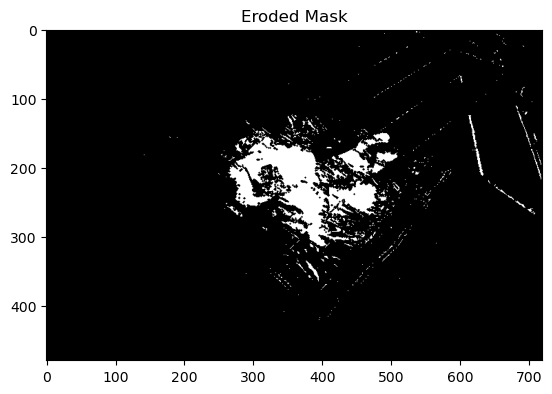

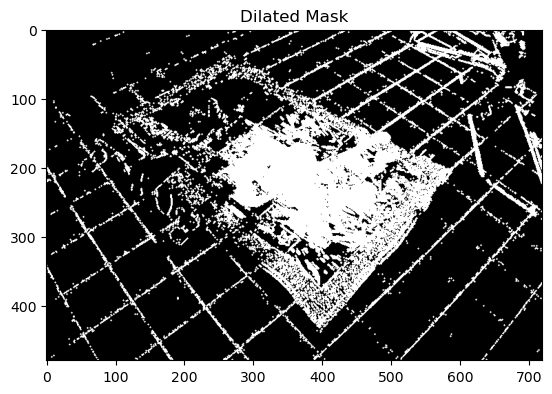

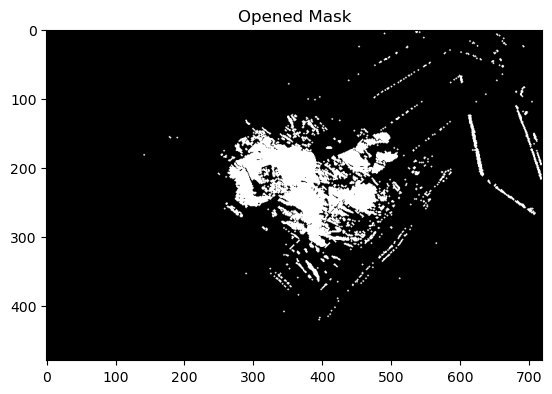

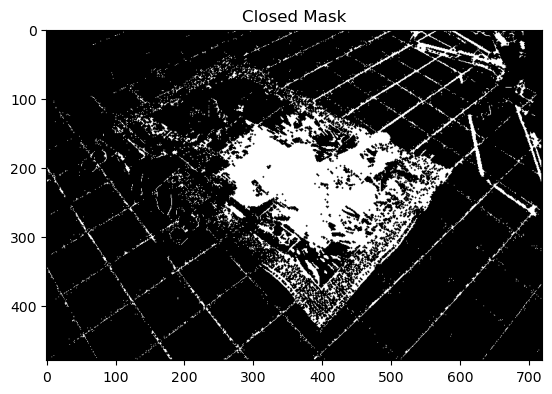

In [65]:
# Perform binary erosion
eroded_mask = ndimage.binary_erosion(mask)
plt.figure()
plt.imshow(eroded_mask, cmap='gray')
plt.title('Eroded Mask')
plt.show()

# Perform binary dilation
dilated_mask = ndimage.binary_dilation(mask)
plt.figure()
plt.imshow(dilated_mask, cmap='gray')
plt.title('Dilated Mask')
plt.show()

# Perform binary opening (erosion followed by dilation)
opened_mask = ndimage.binary_opening(mask)
plt.figure()
plt.imshow(opened_mask, cmap='gray')
plt.title('Opened Mask')
plt.show()

# Perform binary closing (dilation followed by erosion)
closed_mask = ndimage.binary_closing(mask)
plt.figure()
plt.imshow(closed_mask, cmap='gray')
plt.title('Closed Mask')
plt.show()

L'ouverture et l'érosion ont l'air d'assez bien fonctionner

### Q4

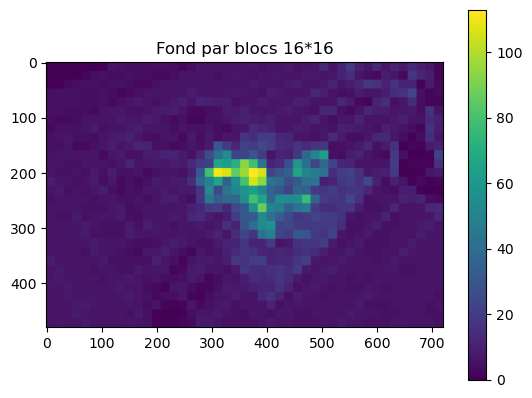

In [66]:
f = np.ones((16, 16)) / 16**2
m = ndimage.convolve(D, f)[::16, ::16]

M = np.repeat(np.repeat(m, 16, axis=0), 16, axis=1)

plt.imshow(M)
plt.colorbar()
plt.title('Fond par blocs 16*16')
plt.show()


### Q5

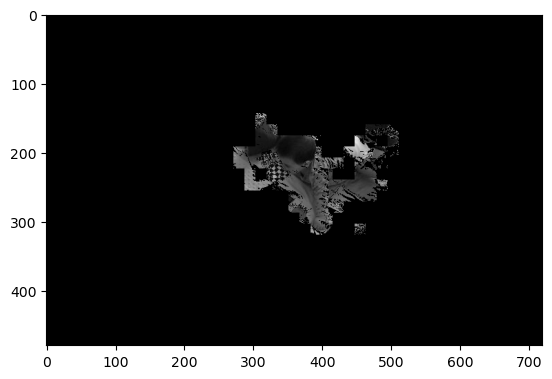

In [67]:
S = np.zeros(I.shape, 'uint8')
S[M > 30] = I[M > 30]
plt.figure()
plt.imshow(S, cmap='gray')
plt.show()